Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

# Table of conents for the Note book

###Approach and Method
####Stages of defining the problem 
  * Data Selection and Exploratory Data analysis and Data cleanup
    * Identify the stages in creating the solution
    * Identify the data source
    * Validate the data source 
    * Clean the data and prepare for the model creation 
    * Create the training and validatation data

  * Model Architecture definition
    * Input Layer 
    * Filters which will extract the feature matrix
    * CNN layers 
    * Pooling layers , 
    * Fully connected Layer 
    * Classification Layer
  * Model validation 

## Answers to the Questions to be answered 

### Importing all the important libraries

In [32]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
import glob




In [33]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
root_path = '/content/drive/MyDrive/Colab Notebooks/data/skin-cancer'

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
path_to_benign_train = root_path+'/Train'
path_to_benign_test = root_path+'/Test'
#data_dir_train= "/mnt/Data/ML-Course_Work/ML-Study-Upgrad/course/DeepLearning/assignment/data"
data_dir_train = '/content/drive/MyDrive/Colab Notebooks/data/skin-cancer'
#path_to_training_dataset="/mnt/Data/ML-Course_Work/ML-Study-Upgrad/course/DeepLearning/assignment/data/Train/"
path_to_training_dataset="/content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/"
print('path_to_benign_train =',path_to_benign_train)
print('path_to_benign_train =',path_to_benign_test)

path_to_benign_train = /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train
path_to_benign_train = /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Test


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [37]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(path_to_benign_train)
data_dir_test = pathlib.Path(path_to_benign_test)

In [38]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

Use 80% of the images for training, and 20% for validation.

In [39]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

batch_size = 32
img_height = 180 # This should map with the height and width of the pretrained model
img_width = 180 # This should map with the height and width of the pretrained model


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7955 files belonging to 9 classes.
Using 6364 files for training.


In [40]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7955 files belonging to 9 classes.
Using 1591 files for validation.


In [41]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [42]:
# # Keras.preprocessing
# # The 1./255 is to convert from uint8 to float32 in range [0,1].
# image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# BATCH_SIZE = 32 
# # For VGG19 the input shape and size by deafult is 244,244 and hence the same is kept
# IMG_HEIGHT = 180 # This should map with the height and width of the pretrained model
# IMG_WIDTH = 180 # This should map with the height and width of the pretrained model
# STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)

# train_data_gen = image_generator.flow_from_directory(directory=str(list(data_dir_train.glob('training'))[0]),
#                                                      batch_size=BATCH_SIZE,
#                                                      shuffle=True,
#                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                      classes = list(class_names))

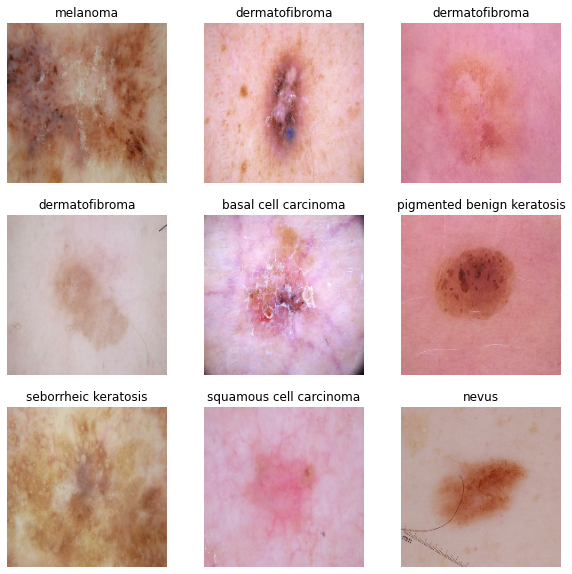

In [43]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [44]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [45]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [47]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.054086186 0.90179753


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [48]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [49]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)       

### Train the model

In [51]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
199/199 [==============================] - 10s 50ms/step - loss: 2.1664 - accuracy: 0.1889 - val_loss: 1.5914 - val_accuracy: 0.4004
Epoch 2/30
199/199 [==============================] - 3s 13ms/step - loss: 1.5061 - accuracy: 0.4394 - val_loss: 1.3362 - val_accuracy: 0.5223
Epoch 3/30
199/199 [==============================] - 3s 13ms/step - loss: 1.2244 - accuracy: 0.5473 - val_loss: 1.1266 - val_accuracy: 0.6166
Epoch 4/30
199/199 [==============================] - 3s 13ms/step - loss: 1.0117 - accuracy: 0.6460 - val_loss: 0.9709 - val_accuracy: 0.6562
Epoch 5/30
199/199 [==============================] - 3s 13ms/step - loss: 0.8001 - accuracy: 0.7226 - val_loss: 0.9135 - val_accuracy: 0.7115
Epoch 6/30
199/199 [==============================] - 3s 13ms/step - loss: 0.6210 - accuracy: 0.7894 - val_loss: 0.7296 - val_accuracy: 0.7687
Epoch 7/30
199/199 [==============================] - 3s 13ms/step - loss: 0.4833 - accuracy: 0.8341 - val_loss: 0.6709 - val_accuracy: 0.784

### Visualizing training results

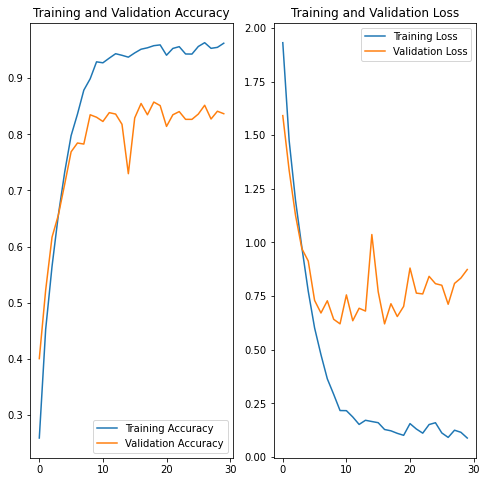

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Validation is getting stuck at 55 percent and the validation loss is at 2.5 all most 

### Write your findings here

In [53]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

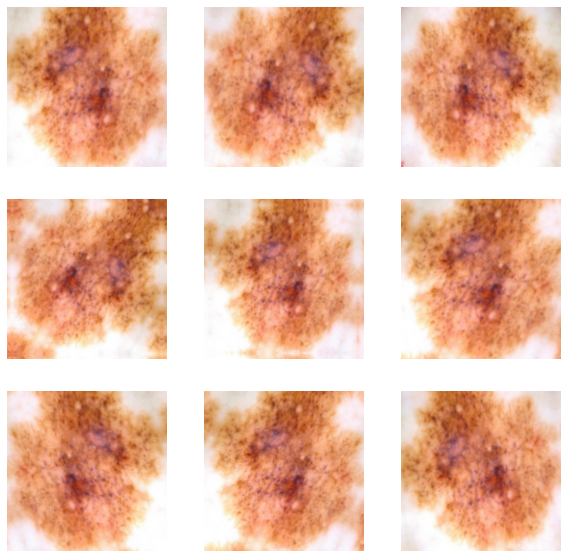

In [54]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [55]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [56]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model2.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 45, 45, 32)       

### Training the model

In [57]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
199/199 [==============================] - 4s 15ms/step - loss: 2.0507 - accuracy: 0.2065 - val_loss: 1.7126 - val_accuracy: 0.3338
Epoch 2/30
199/199 [==============================] - 3s 14ms/step - loss: 1.6395 - accuracy: 0.3790 - val_loss: 1.4574 - val_accuracy: 0.4324
Epoch 3/30
199/199 [==============================] - 3s 14ms/step - loss: 1.4927 - accuracy: 0.4363 - val_loss: 1.3757 - val_accuracy: 0.4934
Epoch 4/30
199/199 [==============================] - 3s 14ms/step - loss: 1.4326 - accuracy: 0.4653 - val_loss: 1.3312 - val_accuracy: 0.5123
Epoch 5/30
199/199 [==============================] - 3s 14ms/step - loss: 1.3256 - accuracy: 0.5032 - val_loss: 1.2719 - val_accuracy: 0.5349
Epoch 6/30
199/199 [==============================] - 3s 14ms/step - loss: 1.2623 - accuracy: 0.5335 - val_loss: 1.1979 - val_accuracy: 0.5588
Epoch 7/30
199/199 [==============================] - 3s 14ms/step - loss: 1.2263 - accuracy: 0.5437 - val_loss: 1.3292 - val_accuracy: 0.4859

### Visualizing the results

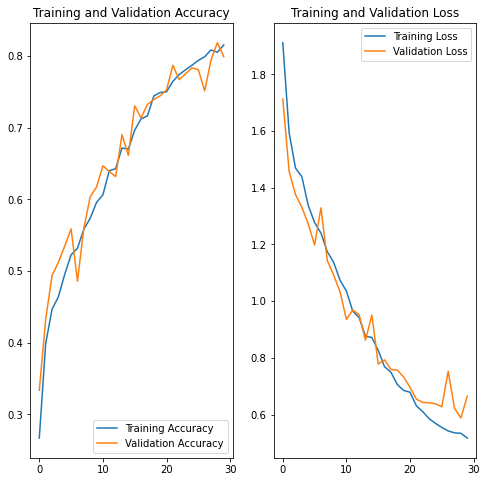

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [59]:
## Your code goes here.

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
    * seborrheic keratosis
    * vascular lesion
    * dermatofibroma
    * actinic keratosis


#### - Which classes dominate the data in terms proportionate number of samples?



! pip!!dadsf#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [60]:
!pip install Augmentor

In [61]:

import Augmentor
for i in class_names:
    print(i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8D7363CB90>: 100%|██████████| 500/500 [00:08<00:00, 57.48 Samples/s]


basal cell carcinoma


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8D8E1E6310>:   0%|          | 1/500 [00:00<01:25,  5.86 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8D72D2AE50>: 100%|██████████| 500/500 [00:08<00:00, 59.97 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8DD059F450>: 100%|██████████| 500/500 [00:08<00:00, 56.84 Samples/s]


melanoma


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F8D732A5E10>: 100%|██████████| 500/500 [00:40<00:00, 12.35 Samples/s]


nevus


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2583x2096 at 0x7F8D73552A10>: 100%|██████████| 500/500 [00:39<00:00, 12.71 Samples/s]


pigmented benign keratosis


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8D7328D090>:   0%|          | 1/500 [00:00<01:19,  6.27 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8D8E15E7D0>: 100%|██████████| 500/500 [00:08<00:00, 56.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F8D73544690>: 100%|██████████| 500/500 [00:19<00:00, 25.05 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8DD055AA10>: 100%|██████████| 500/500 [00:08<00:00, 56.90 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

vascular lesion
Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8DD051DE50>: 100%|██████████| 500/500 [00:09<00:00, 54.97 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [62]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

10216


### Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026335.jpg_4e0c3c97-ae2b-4326-b3f6-beeb351ec6b9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026085.jpg_e33b61e3-c7de-4767-ba35-f7370211d9dc.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025716.jpg_a486e4b0-60ef-46c5-ad13-464497c1bf3c.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027747.jpg_e5bacabb-8d6f-481b-ad80-21c340b6a297.jpg',
 '/content/drive/MyDrive/Colab Notebooks/data/skin-cancer/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027826.jpg_d1ba1cb3-a014-419b-bb42-fcff8ceff51a.jpg',
 '/content/drive/MyDrive/Colab

In [64]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [65]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [66]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [67]:
df2['Label'].value_counts()

actinic keratosis             1500
basal cell carcinoma          1500
dermatofibroma                1216
squamous cell carcinoma       1000
pigmented benign keratosis    1000
seborrheic keratosis          1000
vascular lesion               1000
nevus                         1000
melanoma                      1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [68]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [69]:
#data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12455 files belonging to 9 classes.
Using 9964 files for training.


#### **Todo:** Create a validation dataset

In [70]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12455 files belonging to 9 classes.
Using 2491 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [71]:
## your code goes here
num_classes = 9

model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [72]:
## your code goes here
## Your code goes here
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)       

#### **Todo:**  Train your model

In [73]:
epochs = 50
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
312/312 [==============================] - 70s 217ms/step - loss: 2.0968 - accuracy: 0.3139 - val_loss: 2.1756 - val_accuracy: 0.2168
Epoch 2/50
312/312 [==============================] - 68s 214ms/step - loss: 1.4065 - accuracy: 0.4821 - val_loss: 3.3158 - val_accuracy: 0.2886
Epoch 3/50
312/312 [==============================] - 68s 214ms/step - loss: 1.1831 - accuracy: 0.5683 - val_loss: 4.2829 - val_accuracy: 0.2846
Epoch 4/50
312/312 [==============================] - 68s 213ms/step - loss: 0.9473 - accuracy: 0.6692 - val_loss: 2.6178 - val_accuracy: 0.4163
Epoch 5/50
312/312 [==============================] - 67s 211ms/step - loss: 0.7483 - accuracy: 0.7427 - val_loss: 0.8306 - val_accuracy: 0.7033
Epoch 6/50
312/312 [==============================] - 66s 209ms/step - loss: 0.5925 - accuracy: 0.7947 - val_loss: 1.3128 - val_accuracy: 0.6222
Epoch 7/50
312/312 [==============================] - 67s 211ms/step - loss: 0.4353 - accuracy: 0.8461 - val_loss: 3.4374 - val_ac

#### **Todo:**  Visualize the model results

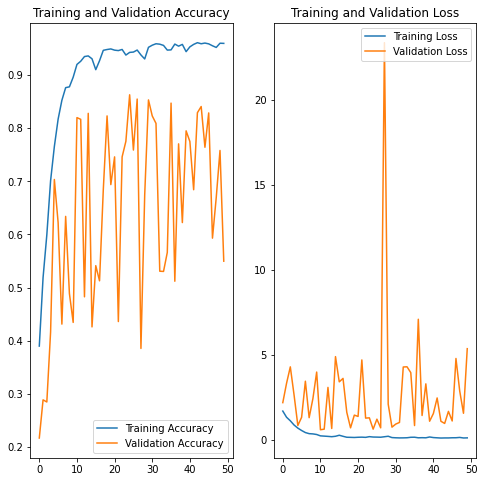

 Accuracy in all epochs ::  [0.38980329036712646, 0.5186672210693359, 0.5991569757461548, 0.7010236978530884, 0.7654556632041931, 0.816840648651123, 0.8523685336112976, 0.8761541843414307, 0.8776595592498779, 0.8958249688148499, 0.9198113083839417, 0.925832986831665, 0.934664785861969, 0.9358691573143005, 0.9304496049880981, 0.9099758863449097, 0.9268366098403931, 0.9464070796966553, 0.9479125142097473, 0.9490164518356323, 0.9467081427574158, 0.9459052681922913, 0.9480128288269043, 0.9374749064445496, 0.9424929618835449, 0.9430951476097107, 0.9469088912010193, 0.9376756548881531, 0.9301485419273376, 0.9520273208618164, 0.9560417532920837, 0.9587514996528625, 0.957948625087738, 0.9556403160095215, 0.9468085169792175, 0.9472099542617798, 0.9581493139266968, 0.9542352557182312, 0.9575471878051758, 0.9438980221748352, 0.9529305696487427, 0.9575471878051758, 0.9607587456703186, 0.9587514996528625, 0.9600561857223511, 0.9585508108139038, 0.954937756061554, 0.9518265724182129, 0.9597551226615

In [74]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print(" Accuracy in all epochs :: ", acc)
print(" Validation Accuracy in all epochs :: ", val_acc)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



by performing the class rebalance we have reached a validation accuracy quit well


In [75]:

batch_size = 32
img_height = 180 # This should map with the height and width of the pretrained model
img_width = 180 # This should map with the height and width of the pretrained model
#path_to_benign_test

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [76]:
# test with a prediction
import tensorflow as tf


predictions = model3.predict(test_ds)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

score = tf.nn.softmax(predictions[110])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



This image most likely belongs to basal cell carcinoma with a 99.95 percent confidence.
This image most likely belongs to nevus with a 100.00 percent confidence.


In [77]:
!mkdir -p saved_model
model3.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets
